# Understanding Deepfakes with Keras

![DCGAN](DCGAN.png)

# Task 1: Importing Libraries and Helper Functions

Please note: If you haven't already, please install the required packages by executing the code cell below.

In [12]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import os
import tfutils

from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Reshape, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from PIL import Image

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.1.0


# Task 2: Importing and Plotting the Data

In [16]:
(x_train,y_train), (x_test,y_test)= tfutils.datasets.mnist.load_data(one_hot=False)

In [17]:
x_train = tfutils.datasets.mnist.load_subset([0], x_train, y_train) #Use just the images belongs to class zero
x_test = tfutils.datasets.mnist.load_subset([0], x_test, y_test) 
x = np.concatenate([x_train,x_test],axis=0) # create a combined list

<IPython.core.display.Javascript object>


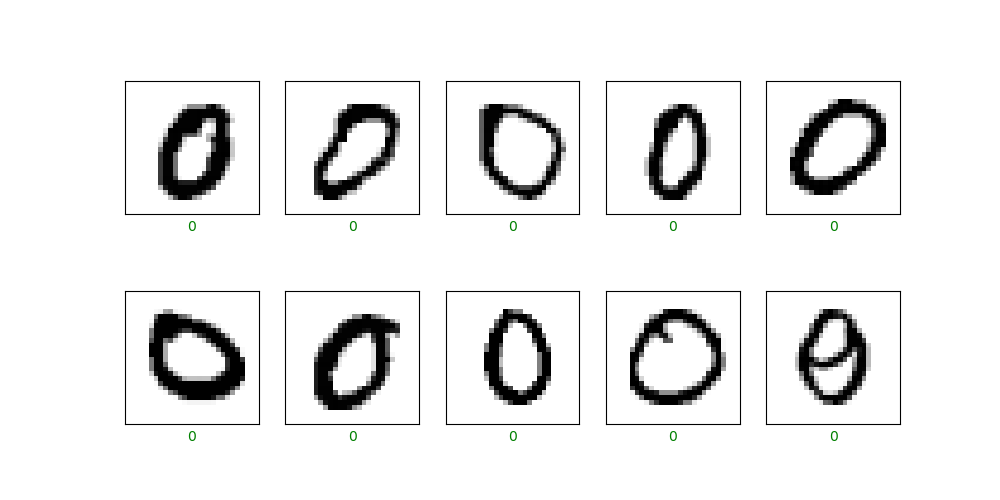

In [18]:
# printing different random examples of the dataset
tfutils.datasets.mnist.plot_ten_random_examples(plt,x,np.zeros((x.shape[0],1))).show()

# Task 3: Discriminator

![Artist and Critic](artist_critic.png)

In [23]:
# Architecture inspired from the original paper 2015 that presented Discriminator
dicriminator=Sequential([
    #first block
    Conv2D(64,3,strides=2, input_shape=(28,28,1)),
    LeakyReLU(), # activation layer
    BatchNormalization(),
    #second block
    Conv2D(128,5,strides=2),
    LeakyReLU(), # activation layer
    BatchNormalization(),
    #third block
    Conv2D(256,5,strides=2),
    LeakyReLU(), # activation layer
    BatchNormalization(),
    
    Flatten(),
    Dense(1,activation='sigmoid')
    
])
opt=tf.keras.optimizers.Adam(lr=2e-4,beta_1=0.5)
dicriminator.compile(loss='binary_crossentropy', optimizer=opt, metrices=['accuracy'])
dicriminator.summary()
dicriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
dicriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 64)        640       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)         8

# Task 4: Generator

In [26]:
generator=Sequential([
    #first block
    Dense(256,activation='relu',input_shape(1,)),
    Reshape((1,1,256)),
    #second block
    Conv2DTranspose (256,5,activation='relu'),
    BatchNormalization(),
    #third block
    Conv2DTranspose(128,5,activation='relu'),
    BatchNormalization(),
    #forth block
    Conv2DTranspose(64,5,strides=2,activation='relu'),
    BatchNormalization(),
    #fifth block    
    Conv2DTranspose(64,5,activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(1,4,activation='sigmoid') #filter
])

generator.summary()

SyntaxError: positional argument follows keyword argument (<ipython-input-26-47fcce7d531d>, line 3)

# Task 5: Generative Adversarial Network (GAN)

# Tasks 6 and 7: Training the GAN